# Linear regression (predicting a continuous value)


Weather Conditions in World War Two: 

1. Is there a relationship between the daily minimum and maximum temperature? 
2. Can you predict the maximum temperature given the minimum temperature?

https://www.kaggle.com/smid80/weatherww2


In [0]:
# Uploading files from your local file system
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))


In [0]:
# install additional packages for Basemap plot
# !apt install proj-bin libproj-dev libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz

In [0]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Importing the dataset
df_summary = pd.read_csv("Summary of Weather.csv", low_memory=False)
df_station = pd.read_csv("Weather Station Locations.csv", low_memory=False)


# Take a quick look at the data structure
## Exploring the data


In [7]:
print(df_summary.shape)
print(df_station.shape)

(119040, 31)
(161, 8)


Exploring the data columns of Dataframes:

In [8]:
print(df_summary.info())
df_summary.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# How categorical data is structured:
df_summary.describe()


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df_station.info())
print ('--'*30)
df_station.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
LAT                 161 non-null object
LON                 161 non-null object
ELEV                161 non-null int64
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.1+ KB
None
------------------------------------------------------------


,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [0]:
#Exploring in *df_summary* the number of values of each 159 Stations: 
#print(df_summary.STA.value_counts())


In [11]:
# Exploring in df_station the number of values of each 161 Stations: 
# print(df_station.WBAN.value_counts())
print(df_station.WBAN.unique().size)

161


In [0]:
# Renaming the name of columns of the dataset of df_summary and df_station 
df_summary = df_summary.rename(columns={'STA': 'station'})
df_station = df_station.rename(columns={'WBAN': 'station'})

In [13]:
# Merging the both data frames by the station key
df = pd.merge(df_summary, df_station, on="station")

# Checking  
print(df.station.unique().size)
df.head()

159


,station,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,RHN,RVG,WTE,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,ACCRA,GH,0536N,00010W,62,5.6,-0.3


In [14]:
print(df.shape)
print(df_summary.shape)
print(df_station.shape)
print(df.info())
print(df.PoorWeather.unique())
print(df.TSHDSBRSGF.unique())


(119040, 38)
(119040, 31)
(161, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 38 columns):
station             119040 non-null int64
Date                119040 non-null object
Precip              119040 non-null object
WindGustSpd         532 non-null float64
MaxTemp             119040 non-null float64
MinTemp             119040 non-null float64
MeanTemp            119040 non-null float64
Snowfall            117877 non-null object
PoorWeather         34237 non-null object
YR                  119040 non-null int64
MO                  119040 non-null int64
DA                  119040 non-null int64
PRCP                117108 non-null object
DR                  533 non-null float64
SPD                 532 non-null float64
MAX                 118566 non-null float64
MIN                 118572 non-null float64
MEA                 118542 non-null float64
SNF                 117877 non-null object
SND                 5563 non-null float64


In [15]:
# Renaming the name of columns of the dataset of df_summary and df_station
df = df.rename(columns={'STATE/COUNTRY ID': 'country'})
df.info()

# Counting the 64 distincs countries:
df.country.unique().size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 38 columns):
station        119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

63

## First Histogram Before clean the Data

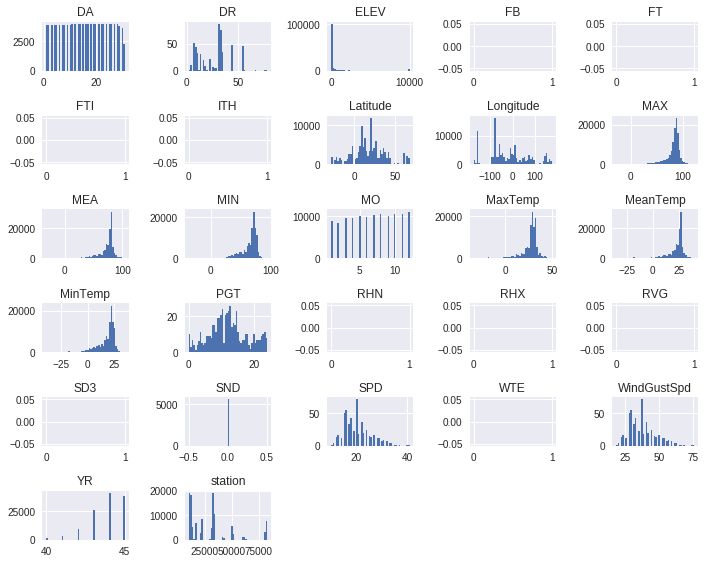

In [16]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,8))
plt.tight_layout()
plt.show()

## Cleaning the data

In [17]:
# Percentage of each column with null values

print (df.isnull().sum()/df.shape[0] * 100)

station          0.000000
Date             0.000000
Precip           0.000000
WindGustSpd     99.553091
MaxTemp          0.000000
MinTemp          0.000000
MeanTemp         0.000000
Snowfall         0.976983
PoorWeather     71.239079
YR               0.000000
MO               0.000000
DA               0.000000
PRCP             1.622984
DR              99.552251
SPD             99.553091
MAX              0.398185
MIN              0.393145
MEA              0.418347
SNF              0.976983
SND             95.326781
FT             100.000000
FB             100.000000
FTI            100.000000
ITH            100.000000
PGT             99.558972
TSHDSBRSGF      71.239079
SD3            100.000000
RHX            100.000000
RHN            100.000000
RVG            100.000000
WTE            100.000000
NAME             0.000000
country          0.000000
LAT              0.000000
LON              0.000000
ELEV             0.000000
Latitude         0.000000
Longitude        0.000000
dtype: float

In [18]:
# Removing columns without significants values: 
#df = df.drop(["Date","WindGustSpd","DR","SPD","SND","PGT","FT","FB","FTI","ITH","SD3","RHX","RHN","RVG","WTE","PoorWeather","TSHDSBRSGF"], axis=1)

# Removing any column with 60% null values is not going to add any value.
cols = [col for col in df.columns if (df[col].isnull().sum()/df.shape[0] * 100 < 60)]
df = df[cols]
print(df.info())

print ('--'*30)

# Removing SNF - SnowFall
df = df.drop(["SNF"], axis=1)

# Removing NAME of Station
df = df.drop(["NAME"], axis=1)

# Removing duplicate columns with Fahrenheit and PRCP values: 
df = df.drop(["Date", "MAX","MIN","MEA", "PRCP", "LAT","LON"], axis=1)


print (df.isnull().sum()/df.shape[0] * 100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119040 entries, 0 to 119039
Data columns (total 22 columns):
station      119040 non-null int64
Date         119040 non-null object
Precip       119040 non-null object
MaxTemp      119040 non-null float64
MinTemp      119040 non-null float64
MeanTemp     119040 non-null float64
Snowfall     117877 non-null object
YR           119040 non-null int64
MO           119040 non-null int64
DA           119040 non-null int64
PRCP         117108 non-null object
MAX          118566 non-null float64
MIN          118572 non-null float64
MEA          118542 non-null float64
SNF          117877 non-null object
NAME         119040 non-null object
country      119040 non-null object
LAT          119040 non-null object
LON          119040 non-null object
ELEV         119040 non-null int64
Latitude     119040 non-null float64
Longitude    119040 non-null float64
dtypes: float64(8), int64(5), object(9)
memory usage: 20.9+ MB
None
--------------------------

In [0]:
# Note that an elevation of 9999 means unknown, so we replace by NaN:
# So there is 3510 readings without Elevation

df.ELEV = pd.to_numeric(df.ELEV, float)

df.loc[df.station == 11501]
# Replacing by NaN:
df.loc[df.ELEV == 9999, "ELEV"] = np.nan
df.ELEV = df.ELEV.fillna(df.ELEV.mean())

In [0]:
# Cleaning the empty data in Precip
df.Precip = pd.to_numeric(df.Precip, float)
df.Precip = df.Precip.fillna(0)


In [21]:
# Cleaning the empty data in Snowfall
df.Snowfall = pd.to_numeric(df.Snowfall, float)

df.Snowfall = df.Snowfall.fillna(0)


print (df.isnull().sum()/df.shape[0] * 100)

station      0.0
Precip       0.0
MaxTemp      0.0
MinTemp      0.0
MeanTemp     0.0
Snowfall     0.0
YR           0.0
MO           0.0
DA           0.0
country      0.0
ELEV         0.0
Latitude     0.0
Longitude    0.0
dtype: float64


## Histogram After cleaning the Data

In [22]:
df.sample(10)

,station,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,country,ELEV,Latitude,Longitude
20024,11601,0.000,30.555556,25.555556,27.777778,0.0,42,4,10,LC,8.0,13.733333,-60.850000
77582,32906,0.000,20.000000,11.111111,15.555556,0.0,43,12,31,IN,111.0,27.483333,95.116667
10690,10705,0.000,31.666667,23.333333,27.777778,0.0,43,12,5,PM,10.0,8.916667,-79.650000
70677,32701,0.000,33.888889,25.555556,30.000000,0.0,42,9,17,IN,167.0,27.166667,78.100000
74468,32803,0.000,35.555556,23.333333,29.444444,0.0,45,3,16,IN,131.0,22.450000,86.716667
100898,50401,2.286,28.888889,23.333333,26.111111,0.0,42,12,4,BZ,13.0,-1.383333,-48.366667
52196,21501,30.226,28.333333,18.888889,23.333333,0.0,45,7,31,HI,11.0,19.716667,-155.066667
72552,32702,0.000,40.000000,28.333333,34.444444,0.0,45,6,5,IN,228.0,26.266667,73.133333
19498,11501,0.000,29.444444,23.333333,26.666667,0.0,45,3,23,BR,55.0,13.066667,-59.583333
118405,82503,1.524,35.000000,22.777778,28.888889,0.0,45,1,31,AU,13.0,-23.400000,150.533333


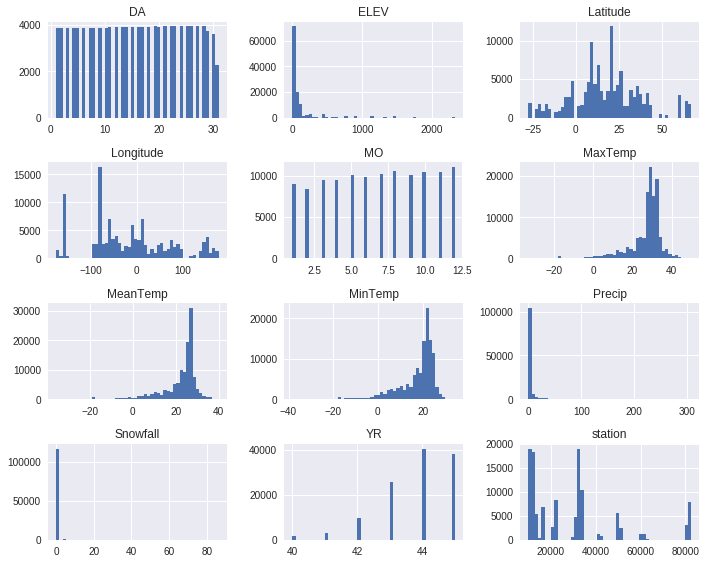

In [23]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10,8))
plt.tight_layout()
plt.show()

## Visualize the Data 


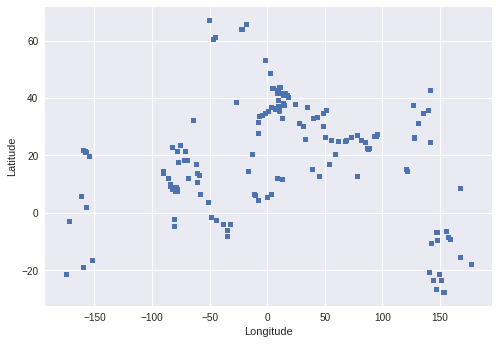

In [24]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.5)

In [0]:
# Cell Configuration for plotly over google colab
# This method pre-populates the outputframe with the configuration that Plotly
# expects and must be executed for every cell which is displaying a Plotly graph.
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [26]:

import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)
import plotly.graph_objs as go # plotly graphical object

# weather station locations

data = [dict(
    type='scattergeo',
    lon = df_station.Longitude,
    lat = df_station.Latitude,
    hoverinfo = 'text',
    text = "Name: " + df_station.NAME + " Country: " + df_station["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
              countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Ploting data with details  

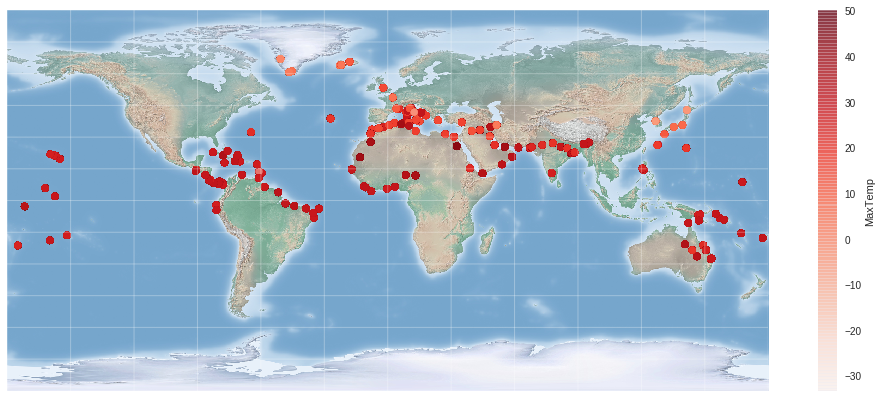

In [27]:
# Extract the data we're interested in
lat = df['Latitude'].values
lon = df['Longitude'].values
maxTemp = df['MaxTemp'].values
maxTemp_max = max(df['MaxTemp'].unique())
maxTemp_min = min(df['MaxTemp'].unique())   
from mpl_toolkits.basemap import Basemap
from itertools import chain

# 1. Draw the map background          
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    #m.etopo()
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

fig = plt.figure(figsize=(18, 7), edgecolor='w')

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
# 2. scatter MaxTemp data, with color reflecting 
m.scatter(lon, lat, latlon=True,
          c=maxTemp, cmap='Reds', alpha=0.5)
# 3. create colorbar and legend
plt.colorbar(label='MaxTemp')
plt.clim(maxTemp_max, maxTemp_min)
draw_map(m)
plt.show()


## Looking for Correlations 


 1- Is there a relationship between the daily minimum and maximum temperature?
 
 2- Can you predict the maximum temperature given the minimum temperature?


In [28]:
corr_matrix = df.corr()
corr_matrix["MaxTemp"].sort_values(ascending=False)
corr_matrix["MinTemp"].sort_values(ascending=False)


MinTemp      1.000000
MeanTemp     0.965425
MaxTemp      0.878384
Precip       0.088455
MO           0.069078
station      0.059319
DA          -0.002576
YR          -0.020733
Longitude   -0.076964
ELEV        -0.212818
Snowfall    -0.307854
Latitude    -0.576044
Name: MinTemp, dtype: float64

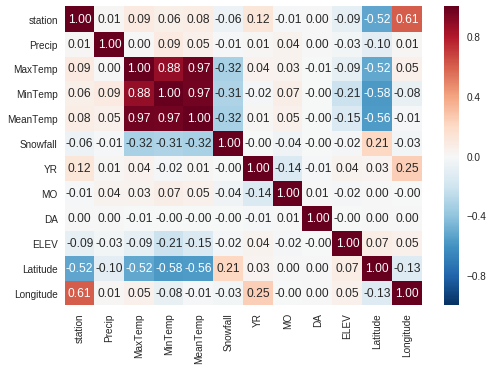

In [29]:
# Ploting correlation Matrix
import seaborn as sns
sns.heatmap(df.corr(), 
            annot=True, fmt=".2f")


## Prepare the Data for Machine Learning Algorithms


In [30]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, 
                                       test_size=0.2, 
                                       random_state=35)

print(train_set.shape)
print(test_set.shape)   #It's good practice to check

train_set.info()

print("data has {} instances\n {} train instances\n {} test intances".
      format(len(df),len(train_set),len(test_set)))


(95232, 13)
(23808, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95232 entries, 90970 to 71369
Data columns (total 13 columns):
station      95232 non-null int64
Precip       95232 non-null float64
MaxTemp      95232 non-null float64
MinTemp      95232 non-null float64
MeanTemp     95232 non-null float64
Snowfall     95232 non-null float64
YR           95232 non-null int64
MO           95232 non-null int64
DA           95232 non-null int64
country      95232 non-null object
ELEV         95232 non-null float64
Latitude     95232 non-null float64
Longitude    95232 non-null float64
dtypes: float64(8), int64(4), object(1)
memory usage: 10.2+ MB
data has 119040 instances
 95232 train instances
 23808 test intances


In [31]:
# drop creates a copy of the remain data and does not affect train_set
# Drop the station key and the Day with low correlation
train_X = train_set.drop(["station","DA","MaxTemp"], axis=1)

# copy the label (y) from train_set
train_y = train_set.MaxTemp.copy()
train_X.describe()
train_X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 95232 entries, 90970 to 71369
Data columns (total 10 columns):
Precip       95232 non-null float64
MinTemp      95232 non-null float64
MeanTemp     95232 non-null float64
Snowfall     95232 non-null float64
YR           95232 non-null int64
MO           95232 non-null int64
country      95232 non-null object
ELEV         95232 non-null float64
Latitude     95232 non-null float64
Longitude    95232 non-null float64
dtypes: float64(7), int64(2), object(1)
memory usage: 8.0+ MB


## Imputer

In [32]:
# First, you need to create an Imputer instance, specifying that you want 
# to replace each attribute’s missing values with the median of that attribute:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

# Since the median can only be computed on numerical attributes, we need to 
# create a copy of the data without the text attribute country:
train_X_num = train_X.drop(["country"], axis=1)

# Now you can fit the imputer instance to the training data using 
# the fit() method:
imputer.fit(train_X_num)

imputer.statistics_

train_X_num.median().values

# Now you can use this “trained” imputer to transform the training set by 
# replacing missing values by the learned medians:
train_X_num_array = imputer.transform(train_X_num)

# The result is a plain Numpy array containing the transformed features. 
# If you want to put it back into a Pandas DataFrame, it’s simple:
train_X_num_df = pd.DataFrame(train_X_num_array, columns=train_X_num.columns)

train_X_num_df.isnull().sum()

Precip       0
MinTemp      0
MeanTemp     0
Snowfall     0
YR           0
MO           0
ELEV         0
Latitude     0
Longitude    0
dtype: int64

## Handling Text and Categorical Attributes


In [33]:

# For this, we can use Pandas' factorize() method which maps each 
# category to a different integer:

train_X.country.unique().size

train_X_cat_encoded, train_X_categories = train_X.country.factorize()

train_X_categories.size
# train_X_cat_encoded is now purely numerical
train_X_cat_encoded
train_X_cat_encoded.size
# Scikit-Learn provides a OneHotEncoder encoder to convert 
# integer categorical values into one-hot vectors.

from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder()

# Numpy's reshape() allows one dimension to be -1, which means "unspecified":
# the value is inferred from the lenght of the array and the remaining
# dimensions
train_X_cat_1hot = encoder.fit_transform(train_X_cat_encoded.reshape(-1,1))

# it is a column vector
train_X_cat_1hot

train_X_cat_1hot.toarray().shape

import sys

print("Using a sparse matrix: {} bytes".format(sys.getsizeof(train_X_cat_1hot.toarray())))
print("Using a dense numpy array: {} bytes".format(sys.getsizeof(train_X_cat_1hot)))


Using a sparse matrix: 47997040 bytes
Using a dense numpy array: 56 bytes


### Feature Scaling into the Pipeline with Categorical Columns


Normalisation is another important concept needed to change all features to the same scale. This allows for faster convergence on learning, and more uniform influence for all weights. More on sklearn website:

http://scikit-learn.org/stable/modules/preprocessing.html

![Scaling](https://python-data-science.readthedocs.io/en/latest/_images/scaling.png)

* **Standard Scaler**: This changes the data to have means of 0 and standard error of 1.
* **Min Max Scaler**: Another way to normalise is to use the Min Max Scaler, which changes all features to be between 0 and 1, as defined below:
![minmaxscaler](https://python-data-science.readthedocs.io/en/latest/_images/minmaxscaler.png)
* **RobustScaler**:  Works similarly to standard scaler except that it uses median and quartiles, instead of mean and variance. Good as it ignores data points that are outliers.
* **Normalizer**: Scales each data point such that the feature vector has a Euclidean length of 1. Often used when the direction of the data matters, not the length of the feature vector.





In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                         ('std_scaler', MinMaxScaler())
                        ])
train_X_num_pipeline = num_pipeline.fit_transform(train_X_num)

train_X_num_pipeline


from sklearn.base import BaseEstimator, TransformerMixin

# This class will transform the data by selecting the desired attributes,
# dropping the rest, and converting the resulting DataFrame to a NumPy array.
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X[self.attribute_names].values


# Used to join two or more pipelines into a single pipeline
from sklearn.pipeline import FeatureUnion

# https://github.com/scikit-learn/scikit-learn/issues/10521
from future_encoders import OneHotEncoder

# numerical columns 
num_attribs = list(train_X_num.columns)

# categorical columns
cat_attribs = ["country"]

In [35]:
# pipeline for numerical columns
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', Imputer(strategy="median")),
                         ('std_scaler', MinMaxScaler())
                        ])

# pipeline for categorical column
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('cat_encoder', OneHotEncoder(sparse=False))
                        ])

# a full pipeline handling both numerical and categorical attributes
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])
    
    
# you can run the whole pipeline simply
train_X_prepared = full_pipeline.fit_transform(train_X)
train_X_prepared 

array([[0.        , 0.67938931, 0.69117647, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.83206107, 0.82352941, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.80916031, 0.82352941, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02066116, 0.73282443, 0.69852941, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.79389313, 0.80882353, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.89312977, 0.88235294, ..., 0.        , 0.        ,
        0.        ]])

In [36]:
# Select and Train a Model with Linear Regression:    
    
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X_prepared, train_y)


# Done!! You now have a working Linear Regression Model.
# Let's try it out on a few instances from the trainning set.

# prepare the data
some_data = train_X.iloc[:10]
some_labels = train_y.iloc[:10]
some_data_prepared = full_pipeline.transform(some_data)

# make predictions
print("Predictions:\n", lin_reg.predict(some_data_prepared)) 

# Compare against the actual values:
print("Labels:\n", list(some_labels))

#Predictions:
# [ 22.10994434  31.02176857  32.40932083  30.0884161   27.33040524
# -16.09238338  17.69641685  32.91080093  29.52301216  30.62093163]
#Labels:
 #[22.22222222, 30.55555556, 32.22222222, 30.0, 27.22222222, -17.77777778, 18.33333333, 32.22222222, 29.44444444, 30.0]

Predictions:
 [ 22.10961914  31.02142334  32.40917969  30.08810425  27.33013916
 -16.09265137  17.69659424  32.91064453  29.52282715  30.62084961]
Labels:
 [22.22222222, 30.55555556, 32.22222222, 30.0, 27.22222222, -17.77777778, 18.33333333, 32.22222222, 29.44444444, 30.0]


In [37]:
from sklearn.metrics import mean_squared_error

maxTemp_predictions = lin_reg.predict(train_X_prepared)
lin_mse = mean_squared_error(train_y, maxTemp_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
# 0.9977151693240739

0.9977153773524307

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X_prepared, train_y)


# now that the model is trained, let's evaluate it on the training set

maxTemp_predictions = tree_reg.predict(some_data_prepared)
tree_mse = mean_squared_error(some_labels, maxTemp_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# Out[]: 0.23215133577685879
# !!!  Possibly an Overfit

0.23215133577685879

## Better Evaluation Using Cross-Validation

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create a LinearRegression model
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, 
                         train_X_prepared, 
                         train_y,
                         scoring="neg_mean_squared_error",
                         cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(rmse_scores)

# Scores: [1.00800747 0.97832064 1.10061952 1.11601526 0.89285406 0.87718403 
# 0.90172418 1.11584188 0.87402073 1.09743711]
# Mean: 0.9962024883330866
#Standard deviation: 0.09948868720373548

Scores: [1.0079913  0.97274628 1.10062987 1.11601612 0.89284084 0.87719161
 0.90173208 1.11584468 0.87402278 1.09744262]
Mean: 0.9956458183338903
Standard deviation: 0.09960423243118867


## Ensemble Learning with RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

# create a RandomForestRegressor model
forest_reg = RandomForestRegressor()

# fit it
forest_reg.fit(train_X_prepared, train_y)

# predict the prepared data
maxTemp_predictions = forest_reg.predict(train_X_prepared)

forest_mse = mean_squared_error(train_y, maxTemp_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
# 0.3444836151079602

0.3474434069344895

In [41]:
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                                train_X_prepared, 
                                train_y,
                                scoring="neg_mean_squared_error", 
                                cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

# Scores: [0.71470253 0.61187966 0.71637515 0.5905535  0.56239746 0.5654571
# 0.90376664 0.55614277 0.64758244 1.04284799]
# Mean: 0.6911705246783553
# Standard deviation: 0.1545939147541989

Scores: [0.71050898 0.60264817 0.67829472 0.60731799 0.55396066 0.54192344
 0.90166831 0.56737394 0.64644866 0.95771055]
Mean: 0.676785543437288
Standard deviation: 0.13679097797919976


## Grid Search with Linear Regression

In [42]:
# With linear Regression
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.model_selection import GridSearchCV

# hyperparameters values
param_grid = [
    {
        'regr': [Lasso(), Ridge()],
        'regr__alpha': np.logspace(-4, 1, 6),
    },
    {
        'regr': [SGDRegressor()],
        'regr__alpha': np.logspace(-5, 0, 6),
        'regr__max_iter': [200, 500],
    },
]

pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('regr', Lasso())
])

# create a randomforeestregressor model
#lin_reg = LinearRegression()


# run the grid search with cross validation
grid_search_LR = GridSearchCV(pipe, 
                           param_grid, 
                           cv=5,
                           scoring='neg_mean_squared_error')

# it may take quite a long time
grid_search_LR.fit(train_X_prepared, train_y)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('regr', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'regr': [Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False,...egr__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]), 'regr__max_iter': [200, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [43]:
grid_search_LR.best_params_


{'regr': Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 'regr__alpha': 0.01}

In [44]:
grid_search_LR.best_estimator_

#Out[]: 
#Pipeline(memory=None,
#     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), 
#     ('regr', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#   normalize=False, random_state=None, solver='auto', tol=0.001))])

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('regr', Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [45]:
# and of course, the evaluation scores are also available
cvres = grid_search_LR.cv_results_
cvres

{'mean_fit_time': array([ 3.93452597,  2.70889444,  1.69824677,  0.30493011,  0.21823177,
         0.21740818,  0.20717773,  0.21155276,  0.20580006,  0.20672636,
         0.20070314,  0.20071354,  7.07515783, 17.51042066,  7.02565942,
        17.30581279,  7.13827982, 17.58205242,  7.09254103, 17.82903419,
         7.16481462, 17.71029735,  7.15334387, 17.93077698]),
 'mean_score_time': array([0.01377835, 0.01398573, 0.01378431, 0.01374097, 0.01336565,
        0.01398063, 0.0144454 , 0.01472859, 0.0151185 , 0.0154635 ,
        0.01584048, 0.01564517, 0.01406856, 0.01384459, 0.01383433,
        0.0137013 , 0.01401467, 0.01414466, 0.01391096, 0.01402149,
        0.0140142 , 0.01385541, 0.0135499 , 0.01406813]),
 'mean_test_score': array([ -1.00134141,  -1.01050077,  -1.51195205,  -5.32393307,
        -76.10229863, -76.10229863,  -1.00101799,  -1.00101731,
         -1.00101156,  -1.00105881,  -1.01105351,  -1.53425544,
         -1.88492065,  -1.18635673,  -2.18374351,  -1.56426704,
     

In [46]:
# model found in gridsearch step of Linear Regression:
model_LR = grid_search_LR.best_estimator_

# predictors and label
test_X = test_set.drop(["station","MaxTemp"], axis=1)
test_y = test_set["MaxTemp"].copy()

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)

predictions = model_LR.predict(test_X_prepared)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
print(rmse)
# 0.7889083444788559

0.7888900637512124


## Grid Search with RandomForestRegressor()

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# hyperparameters values
# param_grid[0] - 12 combinations
# param_grid[1] - 6 combinations
param_grid = [{'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8, 10]
              },
              {'bootstrap': [False], 
               'n_estimators': [3, 10],
               'max_features': [2, 3, 4]
              }
             ]

# create a randomforeestregressor model
forest_reg = RandomForestRegressor()


# run the grid search with cross validation
# (12 + 6) x 5 = 90 combinations
grid_search_RF = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5,
                           scoring='neg_mean_squared_error')

# see 90 combinations!!!
# it may take quite a long time
grid_search_RF.fit(train_X_prepared, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [48]:
grid_search_RF.best_params_
# {'max_features': 10, 'n_estimators': 30}

{'max_features': 10, 'n_estimators': 30}

In [49]:
grid_search_RF.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [50]:
# and of course, the evaluation scores are also available
cvres = grid_search_RF.cv_results_
cvres

{'mean_fit_time': array([0.39430823, 1.27316284, 3.74626179, 0.42552676, 1.33314033,
        4.00790935, 0.44412417, 1.38974609, 4.16580701, 0.48369489,
        1.52488194, 4.43699737, 0.47997651, 1.58139925, 4.64599538,
        0.58546019, 1.85826764, 0.60845447, 1.95015826, 0.61551886,
        1.95695915]),
 'mean_score_time': array([0.02888203, 0.08679495, 0.24611783, 0.02886691, 0.08419781,
        0.24290395, 0.02807646, 0.08104525, 0.23505011, 0.02731524,
        0.08149114, 0.23343287, 0.02694697, 0.07980132, 0.2304976 ,
        0.03290396, 0.09515715, 0.03220444, 0.09514055, 0.03184438,
        0.09393115]),
 'mean_test_score': array([-1.86969794, -1.44559544, -1.29292797, -1.76221482, -1.31363615,
        -1.19386477, -1.64644441, -1.26903735, -1.09154557, -1.64826183,
        -1.17514729, -1.01445912, -1.41058758, -1.02238815, -0.91601469,
        -1.6845943 , -1.28190167, -1.63335171, -1.26940177, -1.64599914,
        -1.23972672]),
 'mean_train_score': array([-0.52709859, -

In [51]:
# best model found in gridsearch step
model_RF = grid_search_RF.best_estimator_

# predictors and label
test_X = test_set.drop(["station","MaxTemp"], axis=1)
test_y = test_set["MaxTemp"].copy()

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)


predictions = model_RF.predict(test_X_prepared)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
print(rmse)
# 0.887287851214794

0.8841232245959731



###  Analyze the Best Models and Their Errors


In [52]:
# can indicate the relative importance of each attribute 
# for making accurate predictions for Random Forest
feature_importances_RF = grid_search_RF.best_estimator_.feature_importances_
feature_importances_RF


# categorical component of pipeline
#cat_encoder = cat_pipeline.named_steps["country"]

# get the names
#cat_one_hot_attribs = list(cat_encoder.categories_[0])

# all columns names
attributes = num_attribs 

sorted(zip(feature_importances_RF, num_attribs), reverse=True)

[(0.39679777434276164, 'MeanTemp'),
 (0.2714962757241163, 'MinTemp'),
 (0.10994111950251637, 'Latitude'),
 (0.031384310057838656, 'Longitude'),
 (0.0271905686985937, 'Snowfall'),
 (0.02113205963960618, 'MO'),
 (0.017602966902445828, 'ELEV'),
 (0.009556852895175603, 'Precip'),
 (0.008530779835691286, 'YR')]


## Presenting my solution with Normalization



In [53]:
# model found in gridsearch step of Linear Regression:
model_LR = grid_search_LR.best_estimator_

# predictors and label
test_X = test_set.drop(["station","MaxTemp"], axis=1)
test_y = test_set["MaxTemp"].copy()

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)

predictions = model_LR.predict(test_X_prepared)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
print(rmse)
# 0.7889083444788559

0.7888900637512124


## Improving the Model 

### Normalizing the features to obtain better results and feedforward the pipeline analysis

![alt text](http://www.tecnosmart.cl/static/images/analitica_datos/0.jpeg)

In [0]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from scipy.stats import boxcox

#weather_data_trimmed_scaled = minmax_scale(weather_data_trimmed.iloc[:, 1:])

cols = ['MeanTemp', 'MinTemp', 'Latitude', 'Snowfall', 'Longitude', 'MO', 'ELEV', 'Precip']
df_trimmed = df[cols]

In [0]:
# Scaling columns:
df_trimmed['MeanTemp'] = minmax_scale(df_trimmed['MeanTemp'])
df_trimmed['MinTemp'] = minmax_scale(df_trimmed['MinTemp'])
df_trimmed['Latitude'] = minmax_scale(df_trimmed['Latitude'])
df_trimmed['Snowfall'] = minmax_scale(df_trimmed['Snowfall'])
df_trimmed['Longitude'] = minmax_scale(df_trimmed['Longitude'])
df_trimmed['MO'] = minmax_scale(df_trimmed['MO'])
df_trimmed['ELEV'] = minmax_scale(df_trimmed['ELEV'])
df_trimmed['Precip'] = minmax_scale(df_trimmed['Precip'])

In [0]:
# Normalizing columns:
Precip_norm  = boxcox(df_trimmed['MeanTemp'].loc[df_trimmed['MeanTemp'] > 0])
MinTemp = boxcox(df_trimmed['MinTemp'].loc[df_trimmed['MinTemp'] > 0])
Snowfall = boxcox(df_trimmed['Snowfall'].loc[df_trimmed['Snowfall'] > 0])
Precip = boxcox(df_trimmed['Precip'].loc[df_trimmed['Precip'] > 0])
ELEV = boxcox(df_trimmed['ELEV'].loc[df_trimmed['ELEV'] > 0])



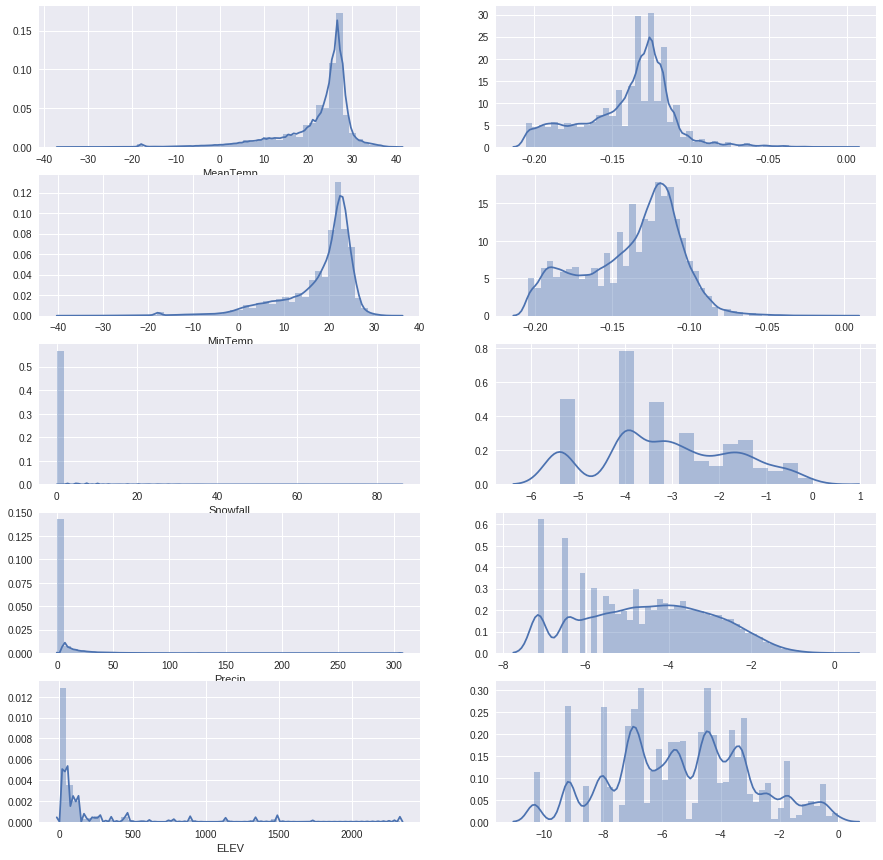

In [57]:
import seaborn as sns

fig, ax = plt.subplots(5, 2, figsize=(15, 15))

sns.distplot(df['MeanTemp'], ax=ax[0][0])
sns.distplot(Precip_norm[0], ax=ax[0][1])

sns.distplot(df['MinTemp'], ax=ax[1][0])
sns.distplot(MinTemp[0], ax=ax[1][1])

sns.distplot(df['Snowfall'], ax=ax[2][0])
sns.distplot(Snowfall[0], ax=ax[2][1])

sns.distplot(df['Precip'], ax=ax[3][0])
sns.distplot(Precip[0], ax=ax[3][1])

sns.distplot(df['ELEV'], ax=ax[4][0])
sns.distplot(ELEV[0], ax=ax[4][1])